### Скачивание датасета, анализ данных

In [ ]:
#вот так можно скачать датасет из kaggle 
# import kagglehub

# Download latest version
#path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")
#print(path)

In [3]:
import pandas as pd
movies = pd.read_csv("https://dev.dd.petrsu.ru/rybin/data/-/raw/1b482cfdb8ec5ca59c1f6fee5617f7c815037422/block2/movies/movies_metadata.csv.gz")  

/tmp/ipykernel_22892/3139591112.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("https://dev.dd.petrsu.ru/rybin/data/-/raw/1b482cfdb8ec5ca59c1f6fee5617f7c815037422/block2/movies/movies_metadata.csv.gz")


In [4]:
movies.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [5]:
ratings = pd.read_csv('https://dev.dd.petrsu.ru/rybin/data/-/raw/1b482cfdb8ec5ca59c1f6fee5617f7c815037422/block2/movies/ratings.csv.gz')
ratings.head()


userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556

In [6]:
print(movies.id.dtype)

object


In [7]:
print(ratings.movieId.dtype)

int64


In [8]:
movies.id = pd.to_numeric(movies.id, errors='coerce').astype('Int64')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce').astype('Int64')


In [9]:
data = pd.merge(ratings, movies, left_on='movieId', right_on='id')

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
print(data['rating'].describe())
popular_movies = data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print(popular_movies)

count    1.143764e+07
mean     3.532719e+00
std      1.066919e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
title
The Million Dollar Hotel              91082
Terminator 3: Rise of the Machines    87901
Solaris                               84318
The 39 Steps                          77045
Monsoon Wedding                       74355
Once Were Warriors                    67662
Three Colors: Red                     66512
License to Wed                        60024
48 Hrs.                               57416
The Passion of Joan of Arc            57232
Name: rating, dtype: int64


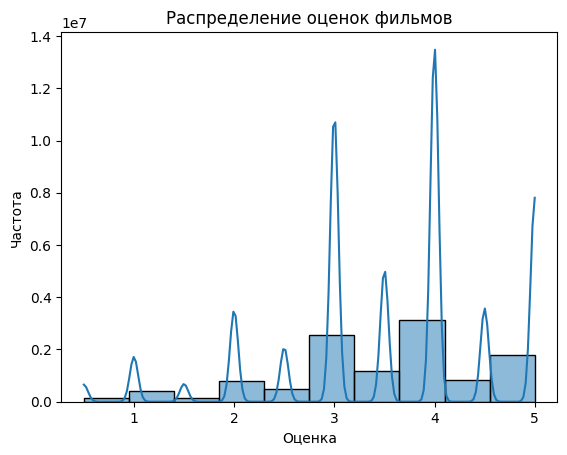

In [12]:
sns.histplot(data['rating'], bins=10, kde=True)
plt.title("Распределение оценок фильмов")
plt.xlabel("Оценка")
plt.ylabel("Частота")
plt.show()

/tmp/ipykernel_22892/1485297995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_movies.values, y=top_movies, palette="viridis")


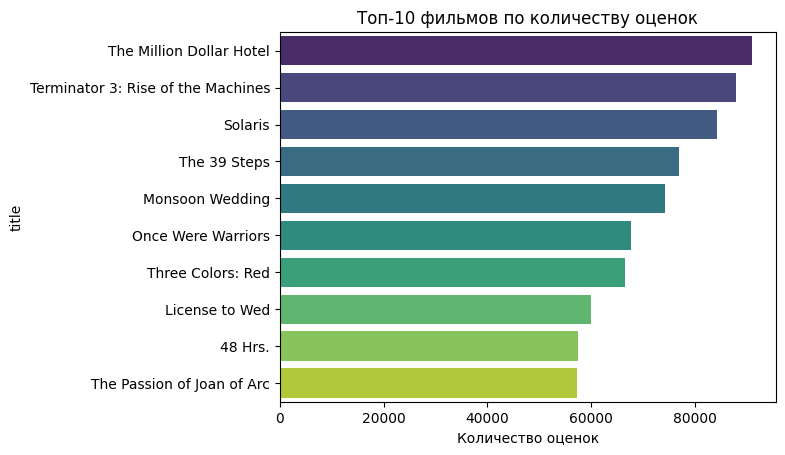

In [13]:
top_movies = popular_movies.index
sns.barplot(x=popular_movies.values, y=top_movies, palette="viridis")
plt.title("Топ-10 фильмов по количеству оценок")
plt.xlabel("Количество оценок")
plt.show()

In [14]:
movies.columns.tolist()


['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [15]:
movies[movies.title == "The Matrix"]

adult                              belongs_to_collection    budget  \
2458  False  {'id': 2344, 'name': 'The Matrix Collection', ...  63000000   

                                                 genres  \
2458  [{'id': 28, 'name': 'Action'}, {'id': 878, 'na...   

                              homepage   id    imdb_id original_language  \
2458  http://www.warnerbros.com/matrix  603  tt0133093                en   

     original_title                                           overview  ...  \
2458     The Matrix  Set in the 22nd century, The Matrix tells the ...  ...   

     release_date      revenue runtime  \
2458   1999-03-30  463517383.0   136.0   

                              spoken_languages    status  \
2458  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                         tagline       title  video vote_average vote_count  
2458  Welcome to the Real World.  The Matrix  False          7.9     9079.0  

[1 rows x 24 columns]

In [16]:
print(data['budget'].dtype)

object


In [17]:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')

In [18]:
data['budget'].fillna(data['budget'].median(), inplace=True)
data['runtime'].fillna(data['runtime'].mean(), inplace=True)

# Удаление выбросов по бюджету
data = data[data['budget'] < data['budget'].quantile(0.95)]

/tmp/ipykernel_22892/4179167658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['budget'].fillna(data['budget'].median(), inplace=True)
/tmp/ipykernel_22892/4179167658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

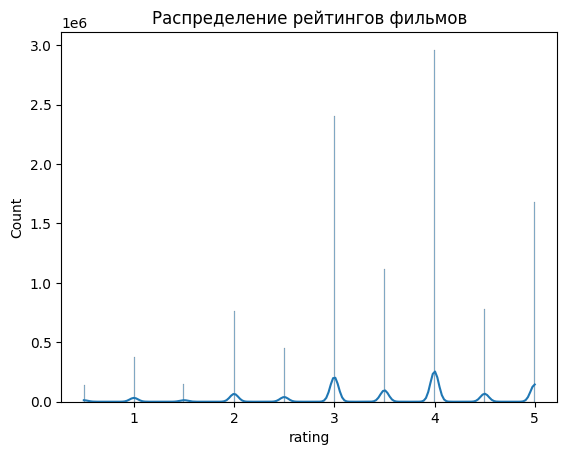

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация распределения рейтингов фильмов
sns.histplot(data['rating'], kde=True)
plt.title("Распределение рейтингов фильмов")
plt.show()


In [20]:
data.popularity

0            7.832755
1            7.268688
2           10.234919
3           11.697604
4            6.285574
              ...    
11437632     0.479388
11437633    10.324613
11437634     0.036044
11437635     0.342469
11437636      0.77848
Name: popularity, Length: 10821864, dtype: object

In [21]:
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

In [22]:
data['popularity_to_budget'] = data['popularity'] / (data['budget'] + 1)

### Модель, обучение, предсказания

In [23]:
from sklearn.model_selection import train_test_split

# Определим признаки и целевую переменную
X = data[['budget', 'runtime', 'popularity_to_budget']]
y = data['rating']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Инициализация и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание и оценка качества
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.133686239111423


In [25]:
i_tmp = 1101
print(X.iloc[i_tmp])
y_tmp = model.predict(X.iloc[i_tmp:i_tmp + 1, :])
print("Получили", y_tmp)
print("Хотели ",  y.iloc[i_tmp])

budget                  6.300000e+07
runtime                 1.270000e+02
popularity_to_budget    1.406949e-07
Name: 1154, dtype: float64
Получили [3.53040378]
Хотели  5.0


In [26]:
print(y_pred)

[3.51895301 3.50709579 3.5250023  ... 3.51586992 3.52132632 3.59846368]


/home/kulakov/projects/csdept/digit/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


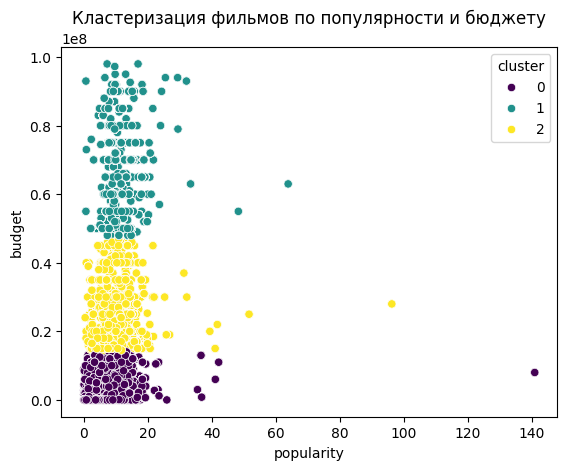

In [27]:
from sklearn.cluster import KMeans
import numpy as np

# Выберем признаки для кластеризации
features = data[['popularity', 'budget', 'runtime']].fillna(0)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

# Визуализация кластеров
sns.scatterplot(x=data['popularity'], y=data['budget'], hue=data['cluster'], palette="viridis")
plt.title("Кластеризация фильмов по популярности и бюджету")
plt.show()

In [28]:
# Оценка качества на тренировочной выборке
train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)

test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

# Если Train MSE значительно меньше Test MSE, возможно, модель переобучилась.

Train MSE: 1.1342665635648734
Test MSE: 1.133686239111423


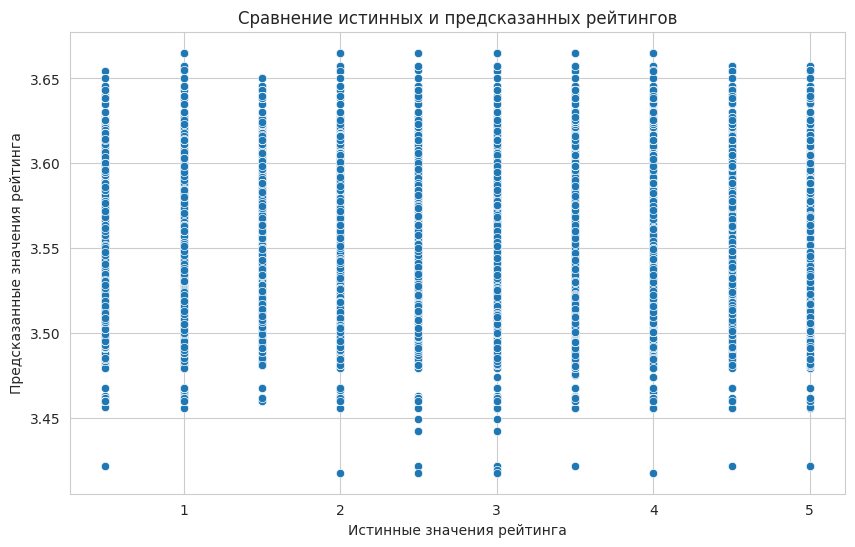

In [29]:
# Визуализация предсказаний vs истинные значения
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Истинные значения рейтинга")
plt.ylabel("Предсказанные значения рейтинга")
plt.title("Сравнение истинных и предсказанных рейтингов")
plt.show()

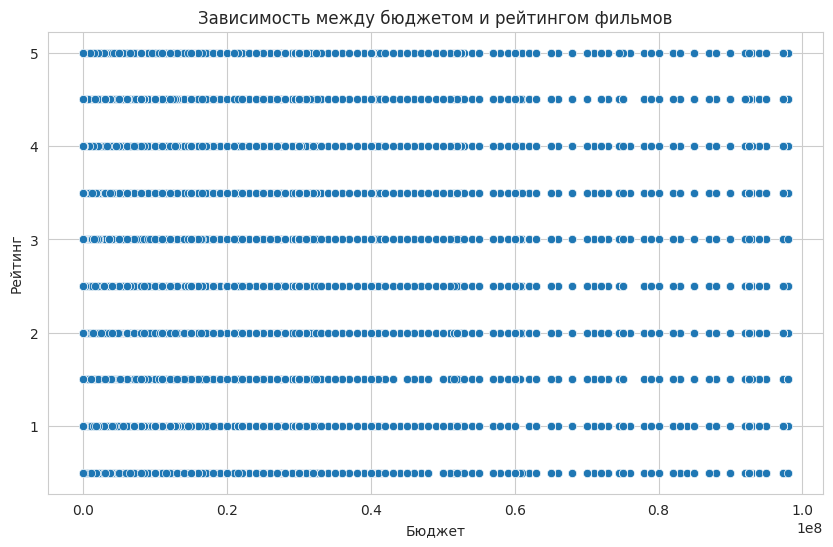

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем график зависимости между бюджетом и рейтингом
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='budget', y='rating')

# Добавляем заголовок и подписи осей
plt.title('Зависимость между бюджетом и рейтингом фильмов')
plt.xlabel('Бюджет')
plt.ylabel('Рейтинг')
plt.show()

### Домашнее задание

## основное задание

1. определите, сколько фильмов в датасете с незаполненным бюджетом (0 или nan)
2. как изменится поведение модели предсказания рейтинга по бюджету и популярности, если убрать все объекты с нулями?
3. оставьтее в оценках по фильму только среднюю оценку фильма, а не все оценки. сделайте мердж, предсказывайте оценку, как в примере на лекции. Как изменится поведение модели?
4. найдите все фильмы, которые были выпущены в тот же год, что и Матрица, имеют длину фильма в диапазоне +- 20 минут от длительности фильма Матрица.
5. визуализируйте информацию о числе оценок и о средей оценке пользователей о фильме, но только среди фильмом из предыдущего пункта

## доп. задание.
1. назовем "близкими" к пользователяю с номером id тех пользователей, у которых по всем фильмам, где они ОБА поставили оценки, средняя разница по оценкам не более D.  
2. напишите функцию, которая по id пользователя ищет все фильмы, по которым он НЕ ставил оценки, при этом другие пользователи, которые "близкие" к нему, поставили оценку 5. 

In [31]:
# сюда вставлять фрагмент кода